In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Đọc dữ liệu vào df_A Tạo 2 dataframe df_train, df_test từ df_train df_train: 80% ngẫu nhiên được lấy từ df_A df_test: 20% còn lại

df_A = pd.read_csv('./exFuelConsumption.csv')
df_A.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2014,ACURA,ILX,2.0,4,9.9,196
1,2014,ACURA,ILX,2.4,4,11.2,221
2,2014,ACURA,ILX HYBRID,1.5,4,6.0,136
3,2014,ACURA,MDX 4WD,3.5,6,12.7,255
4,2014,ACURA,RDX AWD,3.5,6,12.1,244


In [3]:
df_train = df_A.sample(frac = 0.8)
df_train.head()


,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
760,2014,MERCEDES-BENZ,GLK 250 BLUETEC 4MATIC,2.1,4,9.6,230
479,2014,GMC,YUKON XL 4WD,5.3,8,16.0,317
57,2014,AUDI,S5,3.0,6,13.2,262
582,2014,JEEP,COMPASS 4X4,2.4,4,10.3,216
717,2014,MAZDA,MAZDA6 (i-ELOOP),2.5,4,8.4,168


In [4]:
df_test = df_A[~df_A.isin(df_train)].dropna()
df_test.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
6,2014.0,ACURA,TL,3.5,6.0,11.8,232.0
19,2014.0,AUDI,A4,2.0,4.0,9.9,202.0
20,2014.0,AUDI,A4 QUATTRO,2.0,4.0,11.5,230.0
35,2014.0,AUDI,A8L,6.3,12.0,18.2,361.0
38,2014.0,AUDI,Q5,2.0,4.0,12.0,239.0


In [5]:
from numpy import linalg

# 2. Sử dụng ma trận giả đảo để dự báo CO2 Emission theo 3 features Enginesize, Cylinders, FuelConsumption theo từng bước sau:
X = df_train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']]
X.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY
760,2.1,4,9.6
479,5.3,8,16.0
57,3.0,6,13.2
582,2.4,4,10.3
717,2.5,4,8.4


In [6]:
X_inv = linalg.pinv(X)
X_inv

array([[-1.07878972e-03,  2.28923862e-03, -1.96835705e-03, ...,
        -1.50012670e-03, -2.91788648e-03,  9.95246647e-04],
       [ 4.23721955e-04, -1.15368449e-04,  1.27416621e-03, ...,
         4.77430973e-04,  2.11002434e-03,  3.84655410e-05],
       [ 1.52175653e-04, -4.41554870e-04,  3.66214744e-05, ...,
         2.39542404e-04, -1.12426828e-04, -1.96201678e-04]])

In [7]:
y = df_train['CO2EMISSIONS']
y.head()

760    230
479    317
57     262
582    216
717    168
Name: CO2EMISSIONS, dtype: int64

In [8]:
w = X_inv @ y
w

array([-7.79787465, 20.47421536, 12.07472377])

In [9]:
w_engine_size = w[0]
w_cylinders = w[1]
w_fuel_consumption = w[2]

In [10]:
df_test['prediction_1'] = df_test['ENGINESIZE']*w_engine_size + df_test['CYLINDERS']*w_cylinders + df_test['FUELCONSUMPTION_CITY']*w_fuel_consumption
df_test.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS,prediction_1
6,2014.0,ACURA,TL,3.5,6.0,11.8,232.0,238.034471
19,2014.0,AUDI,A4,2.0,4.0,9.9,202.0,185.840877
20,2014.0,AUDI,A4 QUATTRO,2.0,4.0,11.5,230.0,205.160435
35,2014.0,AUDI,A8L,6.3,12.0,18.2,361.0,416.323947
38,2014.0,AUDI,Q5,2.0,4.0,12.0,239.0,211.197797


<AxesSubplot:>

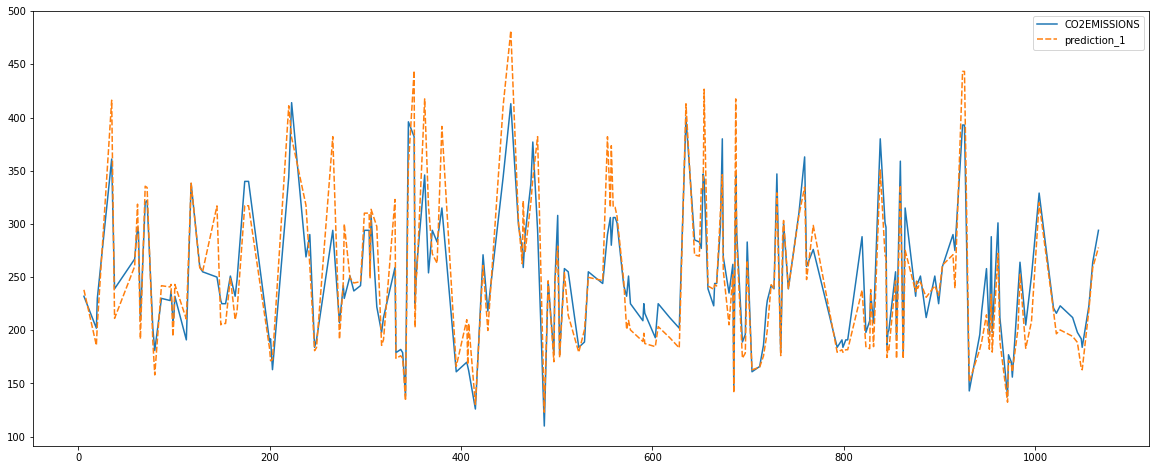

In [11]:
plt.figure(figsize=(20,8))
df_co2_pre_1 = df_test[['CO2EMISSIONS', 'prediction_1']]
sns.lineplot(data=df_co2_pre_1)

In [12]:
import sympy

x = sympy.Symbol('x')
y = sympy.Symbol('y')
z = sympy.Symbol('z')
theta = np.ones(4)
t = np.dot(np.array([1, x, y, z]), theta)
t


1.0*x + 1.0*y + 1.0*z + 1.0

In [13]:
# 3. Sử dụng Gradient Descent với 3 features Enginesize, Cylinders, FuelConsumption tính CO2 Emission
def gradient_descent_3(alpha, x, y, numIterations):
    m = x.shape[0]
    print('m:', m)
    theta = np.ones(x.shape[1])
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        theta0_prime = np.sum(loss)/m
        theta1_prime = np.sum(loss * x[:, 1])/m
        theta2_prime = np.sum(loss * x[:, 2])/m
        theta3_prime = np.sum(loss * x[:, 3])/m

        gradient = np.array([theta0_prime, theta1_prime, theta2_prime, theta3_prime])
        theta = theta - alpha * gradient
        if iter == 0:
            print('hypothesis:\n', hypothesis)
            print('loss:\n', loss)
            print('gradient:\n', gradient)
            print('theta:\n', theta)
    return theta

In [14]:
alpha = 0.00002
m, n = np.shape(X)
print('m', m)
print('n', n)
X = df_train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']]
print('X', X)
x = np.c_[np.ones(m), X]
print('x', x)
y = df_train['CO2EMISSIONS']
print('y', y)
theta = gradient_descent_3(alpha, x, y, 1000)

print('final theta', theta)

m 854
n 3
X      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY
760         2.1          4                   9.6
479         5.3          8                  16.0
57          3.0          6                  13.2
582         2.4          4                  10.3
717         2.5          4                   8.4
..          ...        ...                   ...
22          2.0          4                  11.5
168         3.6          6                  15.1
850         2.0          4                  10.0
495         1.5          4                   7.6
878         3.8          6                  12.6

[854 rows x 3 columns]
x [[ 1.   2.1  4.   9.6]
 [ 1.   5.3  8.  16. ]
 [ 1.   3.   6.  13.2]
 ...
 [ 1.   2.   4.  10. ]
 [ 1.   1.5  4.   7.6]
 [ 1.   3.8  6.  12.6]]
y 760    230
479    317
57     262
582    216
717    168
      ... 
22     230
168    294
850    214
495    159
878    248
Name: CO2EMISSIONS, Length: 854, dtype: int64
m: 854
hypothesis:
 [16.7 30.3 23.2 17.7 15.9 32.2 14.9 23.1 

In [15]:
theta_zero = theta[0]
theta_engine_size = theta[1]
theta_cylinders = theta[2]
theta_fuel_consumption = theta[3]

df_test['prediction_2'] = df_test['ENGINESIZE']*theta_engine_size + df_test['CYLINDERS']*theta_cylinders + df_test['FUELCONSUMPTION_CITY']*theta_fuel_consumption + theta_zero
df_test.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS,prediction_1,prediction_2
6,2014.0,ACURA,TL,3.5,6.0,11.8,232.0,238.034471,230.447740
19,2014.0,AUDI,A4,2.0,4.0,9.9,202.0,185.840877,182.214413
20,2014.0,AUDI,A4 QUATTRO,2.0,4.0,11.5,230.0,205.160435,205.351953
35,2014.0,AUDI,A8L,6.3,12.0,18.2,361.0,416.323947,377.633468
38,2014.0,AUDI,Q5,2.0,4.0,12.0,239.0,211.197797,212.582434


<AxesSubplot:>

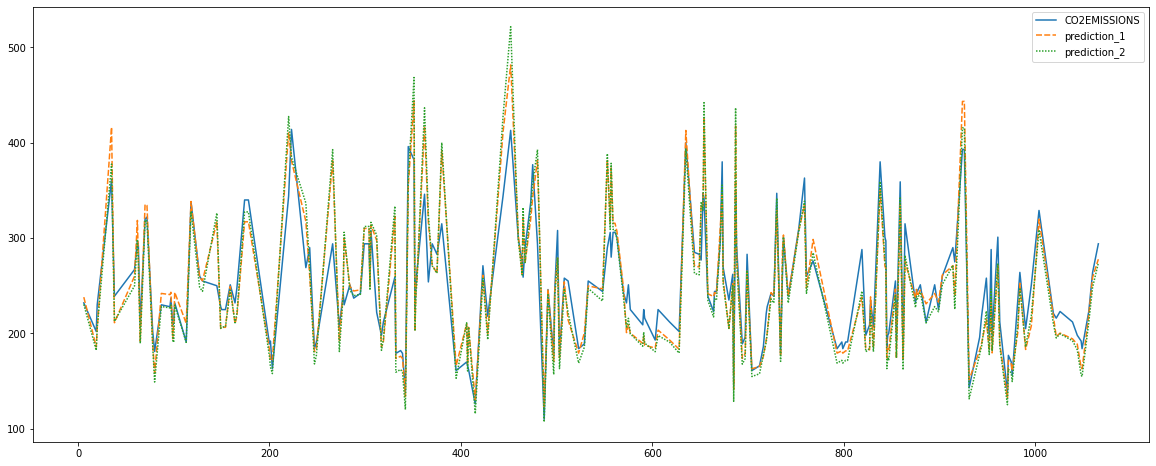

In [16]:
plt.figure(figsize=(20,8))
df_co2_pre_1 = df_test[['CO2EMISSIONS', 'prediction_1', 'prediction_2']]
sns.lineplot(data=df_co2_pre_1)